In [9]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
import shutil
import cv2
from matplotlib.image import imread

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.keras.preprocessing import image

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Num GPUs Available:  1


In [10]:
model = tf.keras.models.load_model("my_model")
#model.summary()

In [11]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [75]:
image_size = (60, 60) 


def predict_image(image_path, show=False):
    
    img = image.load_img(image_path, target_size=image_size)
    img_tensor = image.img_to_array(img)
    
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    
    

    pred = model.predict(img_tensor)
    label = int(np.argmax(pred))
    
    if show and (label in classes.keys()):
        label_class = classes.get(label)
        plt.imshow(img_tensor[0])
        plt.title(f'{label_class}, label: {str(label)}')
        plt.axis('off')
        plt.show()
    return img_tensor, label

In [76]:
labels = []
all_images = []
images = ['11804.png', '02139.png', '02585.png', '01472.png', '00202.png', '00294.png', 
         '01580.png', '01789.png', '01252.png', '00998.png', '00974.png', '00816.png',
         '01213.png', '00362.png', '01533.png', '03311.png', '03359.png', '04042.png',
         '02147.png', '08184.png', '01961.png', '00907.png', '04718.png', '03840.png',
         '01183.png', '01911.png', '05223.png', '01699.png', '03421.png', '07953.png',
         '04070.png', '02152.png', '08000.png', '02953.png', '05292.png', '01157.png',
         '01758.png', '06696.png', '00828.png', '00781.png', '05659.png', '10910.png',
         '09233.png']

correct_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17',
                  '18','19','20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', 
                  '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']

correct_labels = np.array(correct_labels)
correct_labels = correct_labels.astype(np.int32)

assert len(correct_labels) == len(images), "Not Equal"

for i in images:
    image_path = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Test/' + i
    img, single_label = predict_image(image_path)
    labels.append(single_label)
    all_images.append(img)
    
print(f' percentage: {(labels == correct_labels).sum()/len(labels)}')

 percentage: 1.0


In [77]:
correct_labels_classes = list(map(classes.get, correct_labels))
labels_classes = list(map(classes.get, labels))
#labels_classes

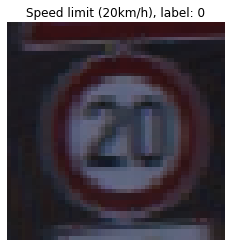

In [78]:
path = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Test/' + '11804.png'
image111, l1 = predict_image(path, show=True)

In [69]:
def show_images(images, cols = 1, titles = None):

    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: 
        titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize=(15,15))
    for n, (img, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(np.ceil(n_images/float(cols)), cols, n + 1)
        if img[0].ndim == 2:
            plt.gray()
        plt.imshow(img[0])
        plt.axis('off')
        a.set_title(title)
    plt.subplots_adjust(hspace=0.3, wspace=0)
    plt.show()

C:\Users\abdel\AppData\Local\Temp/ipykernel_21824/3465336627.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  a = fig.add_subplot(np.ceil(n_images/float(cols)), cols, n + 1)


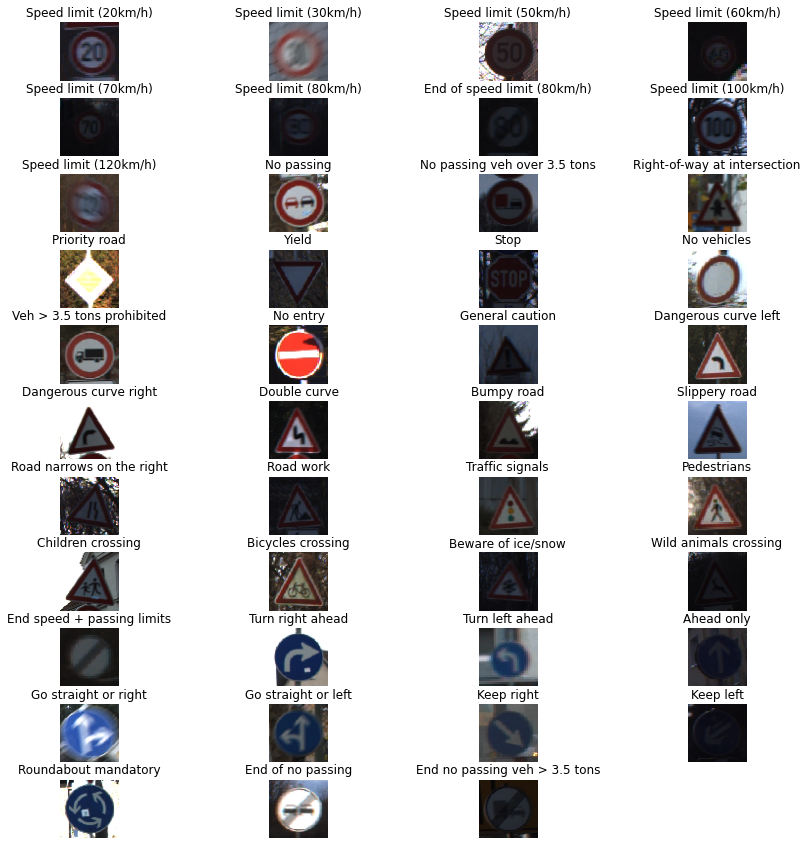

In [70]:
show_images(images=all_images, cols=4, titles=labels_classes)